<a href="https://colab.research.google.com/github/Grimello/MachineLearning-COVID/blob/main/781_Projeto1_EdsonGrimello.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

O objetivo do projeto será desenvolver um estudo no dataset `COVID.csv`, base esta que contém informações sobre casos de COVID. Ou seja a partir do diagnóstico de sintomas e informações dos pacientes deve-se desenvolver um modelo para prever casos confirmados de COVID'.

<br>

A descrição das variáveis contidas no dataset pode ser encontradas a seguir:

 - **id**: Identificação do paciente<br>
 - **sex**: Sexo do Paciente (0 - Homem / 1 - Mulher) <br>
 - **patient_type**: Se o paciente foi dispensado para casa (1) ou se foi internado (0) <br>
 - **intubed**: Seo paciente foi intubado ou não<br>
 - **pneumonia**: Se o paciente apresentou pneumonia ou não<br>
 - **age**: Idade do Paciente<br>
 - **pregnancy**: Se a paciente estava grávida ou não (para pacientes mulheres)<br>
 - **diabetes**: Se o paciente tem diabetes ou não<br>
 - **copd**: Se opaciente tem COPD ou não<br>
 - **asthma**: Se o paciente tem Asma ou não<br>
 - **inmsupr**: Se o paciente apresentou Imunosupressão ou não<br>
 - **hypertension**: Se o paciente tem hipertensão ou não<br>
 - **ohter_disease**: Se o paciente tem outras doenças ou não<br>
 - **cardiovascular**: Se o paciente tem doenças cardiácas ou não<br>
 - **obesity**: Se o paciente tem obesidade ou não<br>
 - **renal_chronic**: Se o paciente tem problemas renais ou não<br>
 - **tobacco**: Se o paciente é fumante ou não<br>
 - **contact_other_covid**: Se o paciente teve contato com outras pessoas diagnosticadas com covid<br>
 - **icu**: Se o paciente precisou ser internado na UTI<br>
 - **covid_res**: Se o resultado do teste foi Positivo ou Negativo<br>
 
PAra ajudar no desenvolvimento do projeto, vamos separar o projeto em algumas seções, conforme descritas a seguir:

- __Preparação dos Dados e Verificação de Consistência__: Neste tópico deve ser feita a verificação da consistência dos dados e caso necessário efetuar eventuais modificações na base de dados. Alguns dos procedimentos que podemos fazer aqui são: Remoção e/ou tratamento de valores faltantes, remoção de duplicatas, ajustes dos tipos de variáveis, análise de _outliers_ entre outras;

<br>

- __Análise Exploratória dos Dados__: Para fazermos a modelagem, precisamos conhecer muito bem os dados que estamos trabalhando. Por isso, nesta parte do projeto vocês desenvolveram an´laises e gráficos a respeito dos dados que estão utilizando. Tente tirar ao máximo informaç~eos sobre as variáveis em si e suas relações com as demais;

<br>

- __Modelagem dos Dados__: Nesta parte, vamos modelar um classificador para os resultados dos exames de COVID (`covid_res`). VocÊs deveram __treinar pelo menos 3 modelos__ (podendo testar mais que 3 também) e de acordo com alguma métrica de avaliação (escolhida por vocÊs), decidir qual será o melhor modelo a ser utilizado!;

<br>

- __Otimização do Modelo__: A partir do modelo escolhido no tópico anterior, vamos tentar aprimorar e garantir um melhor desempenho no modelo, seja fazendo validação cruzada, otimização de parâmetros com _GridSearchCV_ ou _RandomizedSearchCV_ e até mesmo testar diferentes _thresholds_ (ao invés de utilizar a função _predict_ do modelo, utilize a função _predict_proba_ do modelo e a partir das probabilidades determinar qual vai ser o limiar onde será considerado um caso positivo ou negativo);

<br>

- __Conclusões sobre o Projeto__: Para finalizar, descreva as suas conclusões sobre o desenvolvimento do modelo e os resultados obtidos.

# 1.0 **Importação das bibliotecas que serão utilizadas**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import model_selection
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
from scipy.stats import norm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold
from xgboost import XGBClassifier
!pip install dtreeviz
!pip install lightgbm
import lightgbm as lgb
from sklearn import metrics
from lightgbm.sklearn import LGBMClassifier
from prettytable import PrettyTable
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn import set_config
set_config(display='diagram')



     |████████████████████████████████| 61 kB 866 bytes/s 
  Created wheel for dtreeviz: filename=dtreeviz-1.3.3-py3-none-any.whl size=67113 sha256=8d642eaa32d13052a71f8227ba0f7344df45d63a64cfa7f46c10c94b95436f25
  Stored in directory: /root/.cache/pip/wheels/58/9d/65/e57deb90bf5440945d74bc4c19ebb14a0de2ed2b508c609673
Successfully built dtreeviz


# 2.0 **Extração dos dados**

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving COVID.csv to COVID.csv


In [ ]:
covid = pd.read_csv('COVID.csv')

'''Neste projeto, os dados informados foram disponibilizados e serão extraidos de um arquivo csv.'''

# 3.0 **Preparação dos Dados e Verificação de Consistência**

In [ ]:
covid.head()

,Unnamed: 0,sex,patient_type,intubed,pneumonia,age,pregnancy,diabetes,copd,asthma,inmsupr,hypertension,other_disease,cardiovascular,obesity,renal_chronic,tobacco,contact_other_covid,covid_res,icu
0,0,0,1,NaN,0.0,27,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,NaN
1,1,0,1,NaN,0.0,24,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,1,NaN
2,2,1,0,0.0,0.0,54,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,NaN,1,0.0
3,3,0,0,0.0,1.0,30,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,1,0.0
4,4,1,0,0.0,0.0,60,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,NaN,1,0.0


In [ ]:
covid.head().T #visualizando as features

,0,1,2,3,4
Unnamed: 0,0.0,1.0,2.0,3.0,4.0
sex,0.0,0.0,1.0,0.0,1.0
patient_type,1.0,1.0,0.0,0.0,0.0
intubed,NaN,NaN,0.0,0.0,0.0
pneumonia,0.0,0.0,0.0,1.0,0.0
age,27.0,24.0,54.0,30.0,60.0
pregnancy,NaN,NaN,0.0,NaN,0.0
diabetes,0.0,0.0,0.0,0.0,1.0
copd,0.0,0.0,0.0,0.0,0.0
asthma,0.0,0.0,0.0,0.0,0.0


In [ ]:
covid.info() #visualizando numero de linhas e o tipo dos dados


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 499692 entries, 0 to 499691
Data columns (total 20 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Unnamed: 0           499692 non-null  int64  
 1   sex                  499692 non-null  int64  
 2   patient_type         499692 non-null  int64  
 3   intubed              107424 non-null  float64
 4   pneumonia            499681 non-null  float64
 5   age                  499692 non-null  int64  
 6   pregnancy            245258 non-null  float64
 7   diabetes             498051 non-null  float64
 8   copd                 498246 non-null  float64
 9   asthma               498250 non-null  float64
 10  inmsupr              498030 non-null  float64
 11  hypertension         498203 non-null  float64
 12  other_disease        497499 non-null  float64
 13  cardiovascular       498183 non-null  float64
 14  obesity              498222 non-null  float64
 15  renal_chronic    

'''Não temos a presença de dados categóricos que demandem tratamento.'''

In [ ]:
covid.isna().sum().sort_values(ascending=False) #visualizando e analisando a quantidade de NAN para as possibilidades de tratamento dos dados de acordo com a relevância da feature

icu                    392269
intubed                392268
pregnancy              254434
contact_other_covid    153675
other_disease            2193
inmsupr                  1662
diabetes                 1641
tobacco                  1579
cardiovascular           1509
hypertension             1489
renal_chronic            1476
obesity                  1470
copd                     1446
asthma                   1442
pneumonia                  11
age                         0
sex                         0
patient_type                0
covid_res                   0
Unnamed: 0                  0
dtype: int64

In [ ]:
covid.isna().mean().sort_values(ascending=False)

icu                    0.785022
intubed                0.785020
pregnancy              0.509182
contact_other_covid    0.307539
other_disease          0.004389
inmsupr                0.003326
diabetes               0.003284
tobacco                0.003160
cardiovascular         0.003020
hypertension           0.002980
renal_chronic          0.002954
obesity                0.002942
copd                   0.002894
asthma                 0.002886
pneumonia              0.000022
age                    0.000000
sex                    0.000000
patient_type           0.000000
covid_res              0.000000
Unnamed: 0             0.000000
dtype: float64

## 3.1 Algumas conclusões preliminares

'''Apesar da feature 'intubed' apresentar um alto índice de dados faltantes, efetuaremos a substituição partindo do principio que a ausência de informação sugere que o paciente não foi intubado. Segundo dados, em 2020 no Brasil, 80% dos pacientes intubados morreram de Covid, portanto não poderemos descartar a feature. BBC Brasil. Exclusivo: 80% dos intubados morreram por covid-19 no Brasil em 2020, 2021.Disponível em: https://www.bbc.com/portuguese/brasil-56407803. Acesso em 16 de Fevereiro de 2022. 

Como os protocolos de intubação referem que o procedimento deverá ser realizado em UTI's, manteremos também a feature 'icu', pois somentes paciente em estado grave demandam este tipo de internação e perfazem uma média de 10% a 15% dos pacientes com Covid-19. Ministério da Saúde. Orientações sobre a Intubação Orotraqueal em pacientes com Covid-19, 2021. Disponível em: https://www.gov.br/saude/pt-br/coronavirus/publicacoes-tecnicas/recomendacoes/orientacoes-sobre-intubacao-orotraqueal-em-pacientes-com-covid-19 . Acesso em 16 de Fevereiro de 2022.

Apesar também do alto índice de NAN, optamos por manter também a feature 'pregnancy', pois a literatura médica refere gravidez como grupo de risco com evolução favorável a complicações da covid-19. Ministério da Saúde. Manual de Recomendações para a Assistência a Gestante e Puérpera frente a Pandemia de Covid-19, 2021, 2º edição. Disponível em: https://bvsms.saude.gov.br/bvs/publicacoes/manual_assistencia_gestante_puerpera_covid-19_2ed.pdf. Acesso em: 16 de Fevereiro de 2022.

Decidi manter todas as colunas por considerar, a princípio, que todas tem relevância para o modelo.

Demais dados faltantes de outras colunas serão preenchidos com valores 0 ou 1, de acordo com análises. ''' 

## 3.2 Tratando os dados duplicados

In [ ]:
covid[covid.duplicated()]

,Unnamed: 0,sex,patient_type,intubed,pneumonia,age,pregnancy,diabetes,copd,asthma,inmsupr,hypertension,other_disease,cardiovascular,obesity,renal_chronic,tobacco,contact_other_covid,covid_res,icu


In [ ]:
covid.duplicated().sum()  

0

Entendo que os itens considerados 'duplicados' tratam-se de features com os mesmos valores de variáveis e que não necessariamente são duplicados, mas serão 'dropados' por nao serem de valia para o treinamento do modelo.

In [ ]:
covid.shape

(499692, 20)

In [ ]:
covid.drop_duplicates(inplace=True)

In [ ]:
covid.shape # Conferindo os novos valores após drop dos duplicados

(499692, 20)

## 3.3 Analisando e tratando as features com 'missing values'

In [ ]:
covid['pregnancy'].value_counts()

0.0    241644
1.0      3614
Name: pregnancy, dtype: int64

In [ ]:
covid['pregnancy'].isna().sum()

254434

In [ ]:
covid['pregnancy'].fillna(0, inplace=True) #Preenchendo os valores nulos com 0, partindo do princípio que os valores não informados sobre gravidez indiquem desconhecimento por parte do paciente.

In [ ]:
covid['pregnancy'].isna().sum()

0

In [ ]:
covid['intubed'].value_counts()

0.0    98321
1.0     9103
Name: intubed, dtype: int64

In [ ]:
covid['intubed'].isna().sum() # No caso dos missing values da coluna 'intubed' trataremos os NAN com 0. Apesar de termos a info na coluna 'patient_type' de pacientes que foram para casa ou internados, internação não necessariamente indica ida para a UTI e intubação.

392268

In [ ]:
covid['intubed'].fillna(0, inplace=True) #Preenchendo os valores nulos com 0, partindo do princípio que os valores não informados indiquem agravamento da situação e consequentemente intubação.

In [ ]:
covid['intubed'].isna().sum()

0

In [ ]:
print(covid.icu.value_counts())

0.0    98414
1.0     9009
Name: icu, dtype: int64


In [ ]:
covid['icu'].isna().sum()

392269

In [ ]:
covid['icu'].fillna(0, inplace=True) #Preenchendo os valores nulos com 0, partindo do princípio que os valores não informados não indiquem agravamento da situação e consequentemente internação na UTI.

In [ ]:
covid['icu'].isna().sum()

0

In [ ]:
covid['contact_other_covid'].isna().sum()

153675

In [ ]:
covid['contact_other_covid'].fillna(0, inplace=True) #Preenchendo os valores nulos com 0, partindo do princípio que os valores não informados indiquem desconhecimento da existência de contato com pessoas diagnosticadas

In [ ]:
covid['contact_other_covid'].isna().sum()

0

'''Nas features com maior relevância e maior quantidade de NAN foi realizada a análise uma a uma e, após a análise, conclui que a melhor opção era zerar. Para as demais colunas, apenas farei a substituição geral por zero, pois entendo que há apenas a necessidade de preenchimento dos valores nulos.'''

In [ ]:
covid.fillna(0, inplace=True)

In [ ]:
covid.isna().sum()

Unnamed: 0             0
sex                    0
patient_type           0
intubed                0
pneumonia              0
age                    0
pregnancy              0
diabetes               0
copd                   0
asthma                 0
inmsupr                0
hypertension           0
other_disease          0
cardiovascular         0
obesity                0
renal_chronic          0
tobacco                0
contact_other_covid    0
covid_res              0
icu                    0
dtype: int64

# 4.0 **Análise Exploratória dos Dados**

In [ ]:
covid.describe().T #Análise das medidas de posição para auxílio na compreensão das features.

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,499692.0,249845.500000,144248.799693,0.0,124922.75,249845.5,374768.25,499691.0
sex,499692.0,0.493492,0.499958,0.0,0.00,0.0,1.00,1.0
patient_type,499692.0,0.784775,0.410978,0.0,1.00,1.0,1.00,1.0
intubed,499692.0,0.018217,0.133736,0.0,0.00,0.0,0.00,1.0
pneumonia,499692.0,0.157529,0.364299,0.0,0.00,0.0,0.00,1.0
age,499692.0,42.545942,16.640391,0.0,31.00,41.0,53.00,120.0
pregnancy,499692.0,0.007232,0.084736,0.0,0.00,0.0,0.00,1.0
diabetes,499692.0,0.124775,0.330464,0.0,0.00,0.0,0.00,1.0
copd,499692.0,0.016562,0.127624,0.0,0.00,0.0,0.00,1.0
asthma,499692.0,0.032448,0.177187,0.0,0.00,0.0,0.00,1.0


In [ ]:
covid = covid.drop(columns=['Unnamed: 0']) # removendo a coluna indice 'Unnamed: 0' que será inútil para o modelo

In [ ]:
covid.head()

,sex,patient_type,intubed,pneumonia,age,pregnancy,diabetes,copd,asthma,inmsupr,hypertension,other_disease,cardiovascular,obesity,renal_chronic,tobacco,contact_other_covid,covid_res,icu
0,0,1,0.0,0.0,27,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0.0
1,0,1,0.0,0.0,24,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0.0
2,1,0,0.0,0.0,54,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1,0.0
3,0,0,0.0,1.0,30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0.0
4,1,0,0.0,0.0,60,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1,0.0


## 4.1 Verificação de possíveis correlações

In [ ]:
correlaçao = covid.corr()
print(correlaçao)

                          sex  patient_type  ...  covid_res       icu
sex                  1.000000      0.098333  ...  -0.072825 -0.037330
patient_type         0.098333      1.000000  ...  -0.204016 -0.258741
intubed             -0.040803     -0.260112  ...   0.076217  0.487854
pneumonia           -0.087525     -0.657562  ...   0.202125  0.251590
age                 -0.037737     -0.324000  ...   0.167923  0.066775
pregnancy            0.086471     -0.011101  ...  -0.008128  0.000505
diabetes            -0.017233     -0.264968  ...   0.105544  0.072817
copd                -0.005305     -0.122812  ...   0.007024  0.025431
asthma               0.046843      0.018101  ...  -0.024948 -0.005969
inmsupr              0.007463     -0.097880  ...  -0.017521  0.032392
hypertension        -0.009072     -0.238412  ...   0.091464  0.057834
other_disease        0.026344     -0.091713  ...  -0.011986  0.027289
cardiovascular      -0.010639     -0.103995  ...   0.003224  0.035744
obesity             

In [ ]:
#Correlação entre as variáveis e a target 'covid_res'
for x in covid.columns:
    print(covid[[x,'covid_res']].corr())
    print()

                sex  covid_res
sex        1.000000  -0.072825
covid_res -0.072825   1.000000

              patient_type  covid_res
patient_type      1.000000  -0.204016
covid_res        -0.204016   1.000000

            intubed  covid_res
intubed    1.000000   0.076217
covid_res  0.076217   1.000000

           pneumonia  covid_res
pneumonia   1.000000   0.202125
covid_res   0.202125   1.000000

                age  covid_res
age        1.000000   0.167923
covid_res  0.167923   1.000000

           pregnancy  covid_res
pregnancy   1.000000  -0.008128
covid_res  -0.008128   1.000000

           diabetes  covid_res
diabetes   1.000000   0.105544
covid_res  0.105544   1.000000

               copd  covid_res
copd       1.000000   0.007024
covid_res  0.007024   1.000000

             asthma  covid_res
asthma     1.000000  -0.024948
covid_res -0.024948   1.000000

            inmsupr  covid_res
inmsupr    1.000000  -0.017521
covid_res -0.017521   1.000000

              hypertension  covid

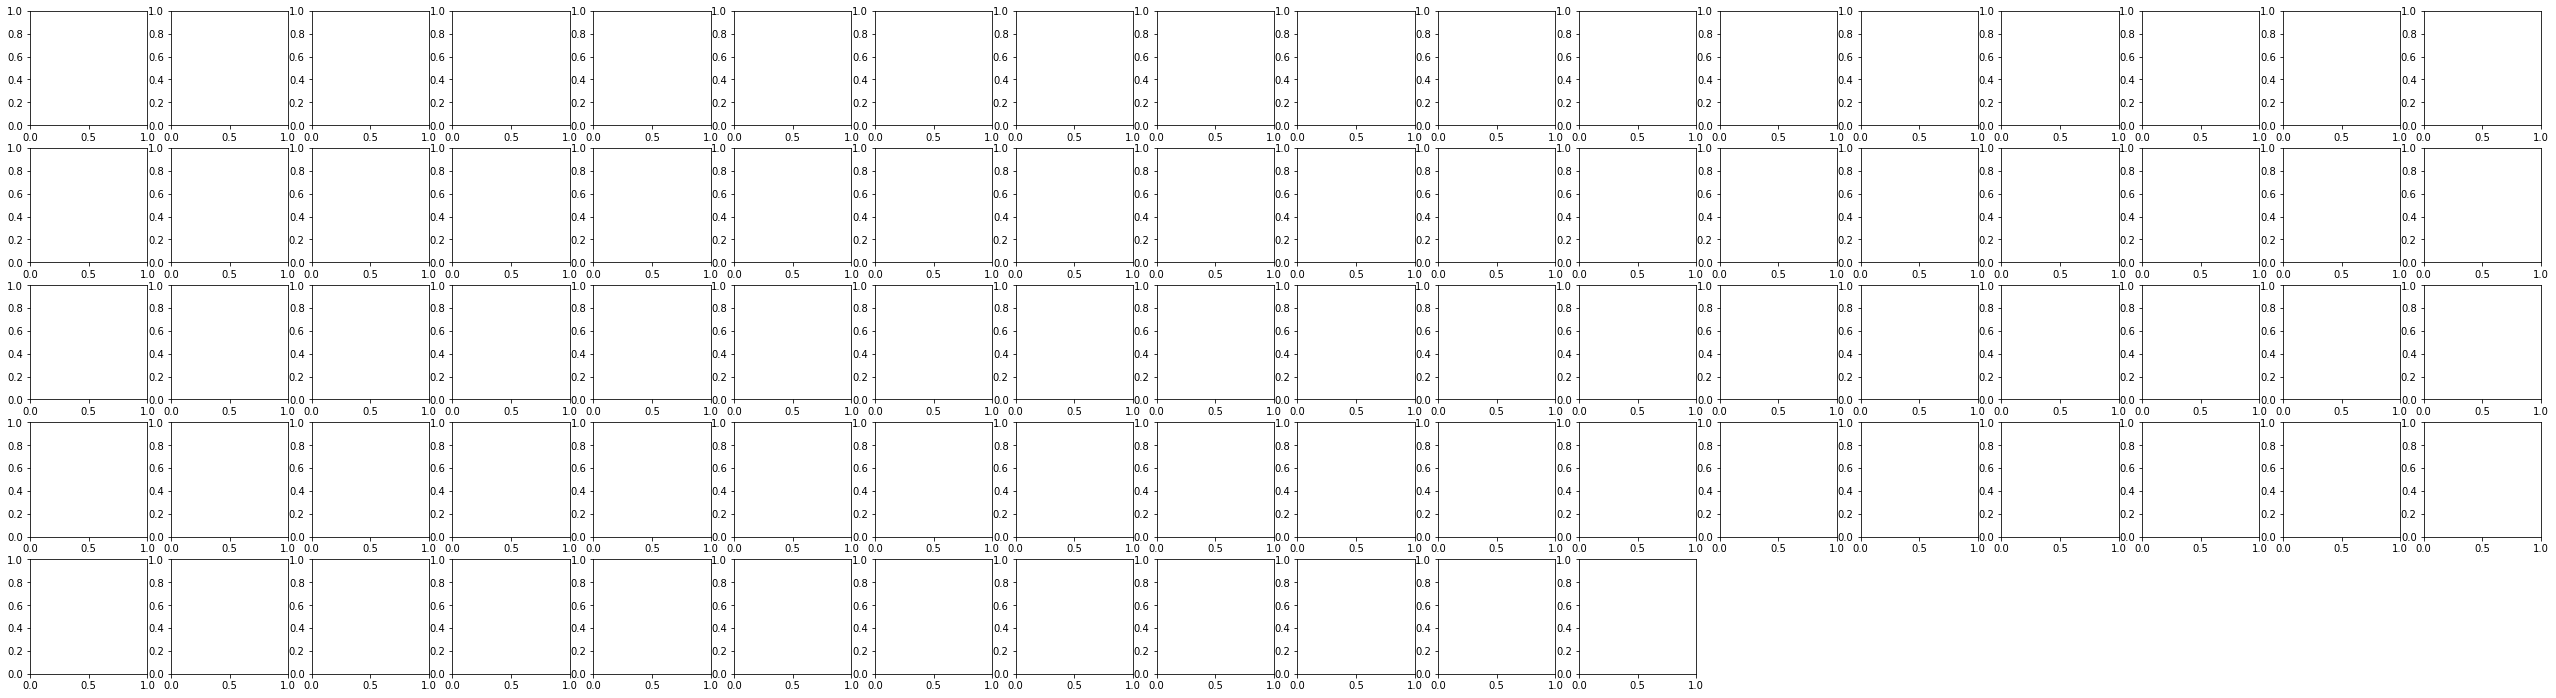

In [ ]:
sns.pairplot(covid, hue='age') #Usando pairplot para visualização. Obs: Dando erro e o Colab pede upgrade para o colab Pro.
plt.show()

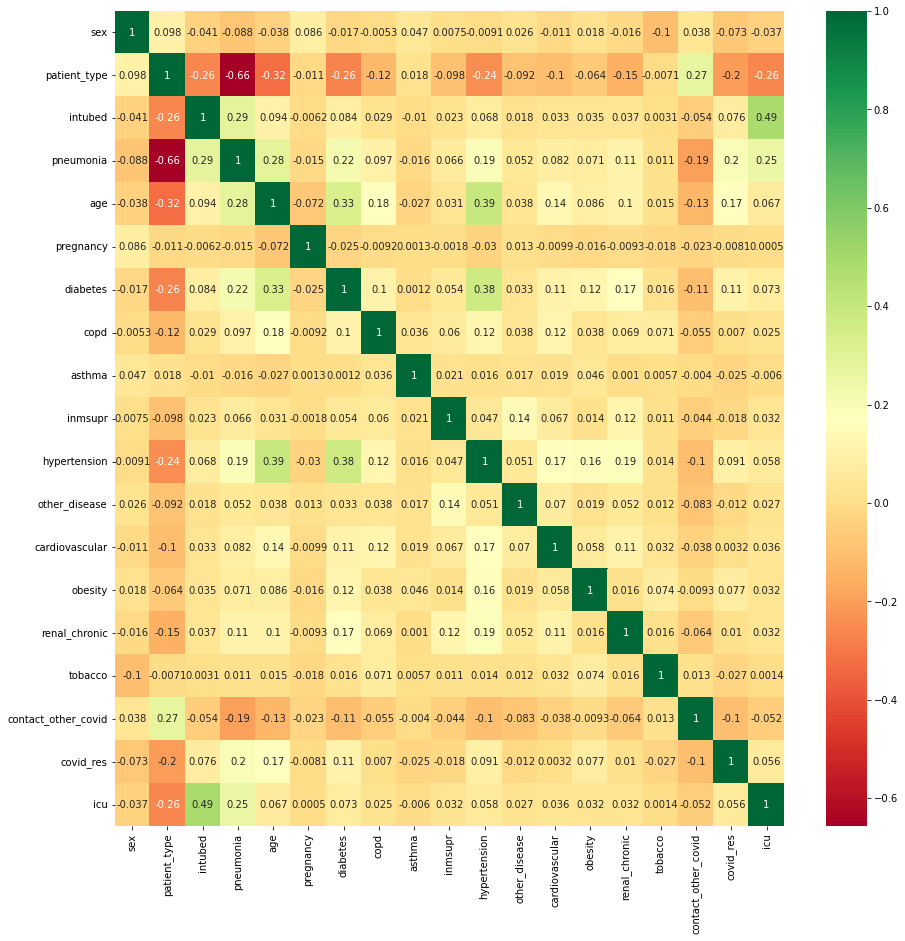

In [ ]:
plt.figure(figsize=(15,15))
sns.heatmap(covid.corr(), color='k', annot=True, cmap='RdYlGn')
plt.show() # Usando mapa de calor para auxílio na visualização de variáveis correlacionadas.

'''Não foram identificados nos valores e na análise dos gráficos nenhuma correlação mais forte (Próximo a 1 ou -1) positiva ou negativa. Todos os valores observados demonstram proximidade de 0, demonstrando correlações fracas ou ausentes. Corroborando a análise inicial sobre a relação das features 'icu' e 'intubed' (3.1 Algumas conclusões preliminares), percebe-se no mapa de calor que são as variáveis mais forte positivamente. A medida que aumenta as internações em UTI, aumentam as intubações. Por diversas vezes e em computadores diferentes tentei rodar o pairplot, mas sempre recebi mensagens do colab que eu teria que aumentar o plano para o colab pro, portanto não foi possível utilizar a visualização para quaisquer análises'''

## 4.2 Verificação e tratamento de Outliers



'''Por se tratarem de dados binários, cujos valores são 0 ou 1, entendo que a presença de outliers que demandam tratamento se dará na verificação apenas nos dados das features 'age' e apenas correções na coluna
'pregnancy', para os casos de 'sex'==0.'''

In [ ]:
covid['pregnancy'].value_counts()

0.0    496078
1.0      3614
Name: pregnancy, dtype: int64

In [ ]:
covid.groupby('sex')['pregnancy'].sum() # conferindo se não há gravidez no gênero incorreto

sex
0       0.0
1    3614.0
Name: pregnancy, dtype: float64

In [ ]:
covid['age']

0         27
1         24
2         54
3         30
4         60
          ..
499687    77
499688    63
499689    25
499690    45
499691    51
Name: age, Length: 499692, dtype: int64

In [ ]:
covid.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 499692 entries, 0 to 499691
Data columns (total 19 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   sex                  499692 non-null  int64  
 1   patient_type         499692 non-null  int64  
 2   intubed              499692 non-null  float64
 3   pneumonia            499692 non-null  float64
 4   age                  499692 non-null  int64  
 5   pregnancy            499692 non-null  float64
 6   diabetes             499692 non-null  float64
 7   copd                 499692 non-null  float64
 8   asthma               499692 non-null  float64
 9   inmsupr              499692 non-null  float64
 10  hypertension         499692 non-null  float64
 11  other_disease        499692 non-null  float64
 12  cardiovascular       499692 non-null  float64
 13  obesity              499692 non-null  float64
 14  renal_chronic        499692 non-null  float64
 15  tobacco          

In [ ]:
age_q1 = covid['age'].quantile(0.25)
age_q3 = covid['age'].quantile(0.75)
iqr = age_q3 - age_q1
lim_inf = age_q1 - 1.5*iqr
lim_sup = age_q3 + 1.5*iqr
print('Outliers:')
print('Q1: ', age_q1)
print('Q3: ', age_q3)
print('IQR:              ', iqr)
print('Limite Inferior:  ', lim_inf)
print('Limite Superior:  ', lim_sup)

Outliers:
Q1:  31.0
Q3:  53.0
IQR:               22.0
Limite Inferior:   -2.0
Limite Superior:   86.0


In [ ]:
covid['age'].min()

0

In [ ]:
covid['age'].max()

120

In [ ]:
covid['age'].value_counts().tail(20)

100    41
102    14
101    13
103     8
104     6
109     5
120     5
108     3
106     3
113     2
110     2
119     2
114     2
118     1
116     1
117     1
115     1
105     1
107     1
111     1
Name: age, dtype: int64

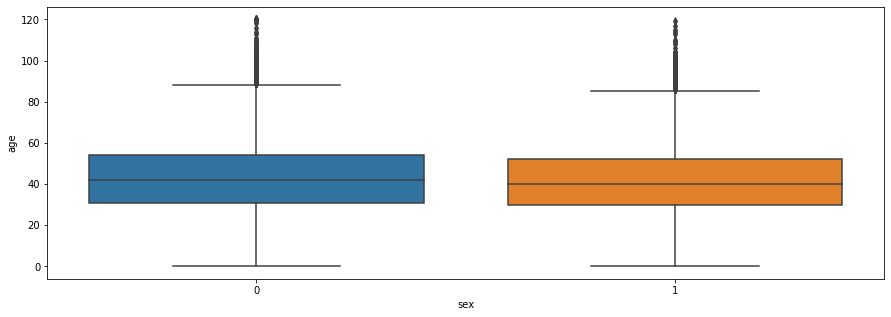

In [ ]:
plt.figure(figsize=(15,5)) # boxplot para melhor visualização dos outliers e distribuição de valores
sns.boxplot(x='sex', y='age', data=covid)
plt.show()

'''No Brasil a expectativa de vida chega a 76 anos e mundialmente hoje existem mais de 269000 pessoas acima de 100 anos e chegará a 3.8 milhões em 2050. Entendo que a presença de alguns valores provavelmente erroneos, aliado ao fato de que não sabemos a que país se refere o dataset, como por exemplo 5 pessoas com 120 anos, não influenciará no modelo, portanto manterei os dados.
IBGE.Em 2019 a expectativa de vida era de 76,6 anos, 2020. Disponível em : https://agenciadenoticias.ibge.gov.br/agencia-sala-de-imprensa/2013-agencia-de-noticias/releases/29502-em-2019-expectativa-de-vida-era-de-76-6-anos . Acesso em: 19 de Fevereiro de 2022.
Revista Kairós PUCSP. Centenários no Mundo: Uma visão panorâmica, 2009. Disponível em: https://revistas.pucsp.br/kairos/article/download/2788/1823/6183 . Acesso em: 19 de Fevereiro 2022. ''' 

##4.3 Mais visualizações de gráficos para compreensão dos dados

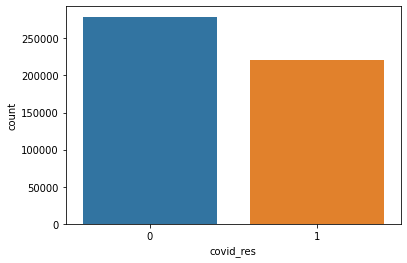

In [ ]:
sns.countplot(x='covid_res', data=covid)

,sex,patient_type,intubed,pneumonia,age,pregnancy,diabetes,copd,asthma,inmsupr,hypertension,other_disease,cardiovascular,obesity,renal_chronic,tobacco,contact_other_covid,covid_res,icu
0,0,1,0.0,0.0,27,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0.0
1,0,1,0.0,0.0,24,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0.0
2,1,0,0.0,0.0,54,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1,0.0
3,0,0,0.0,1.0,30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0.0
4,1,0,0.0,0.0,60,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499687,0,1,0.0,1.0,77,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0,0.0
499688,0,0,1.0,1.0,63,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0,0.0
499689,1,1,0.0,0.0,25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0
499690,1,1,0.0,0.0,45,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0,0.0


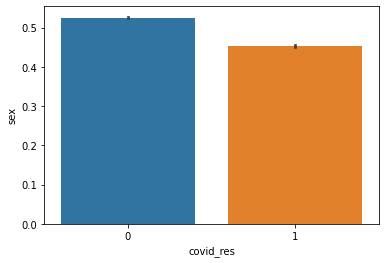

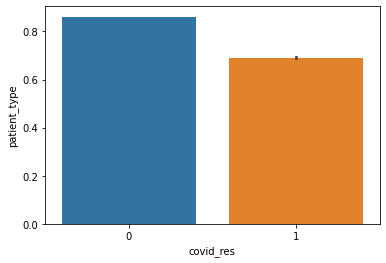

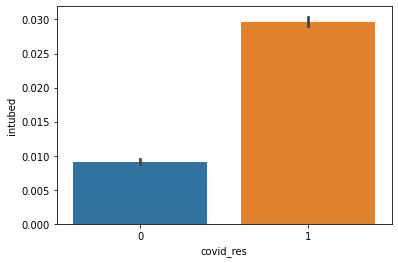

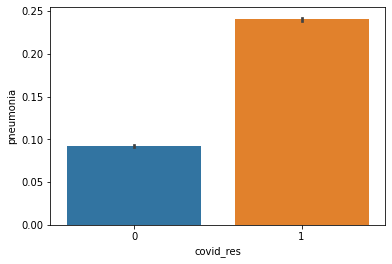

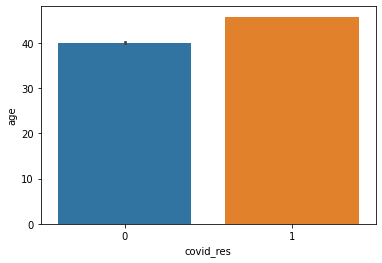

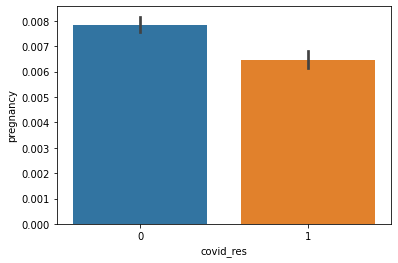

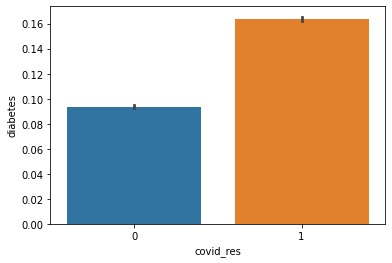

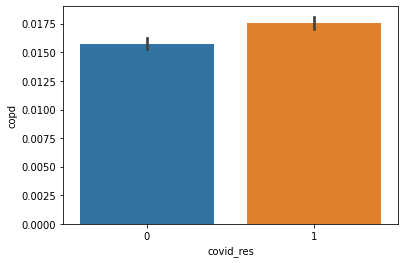

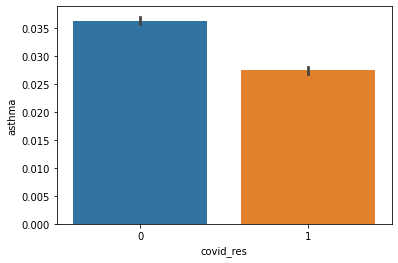

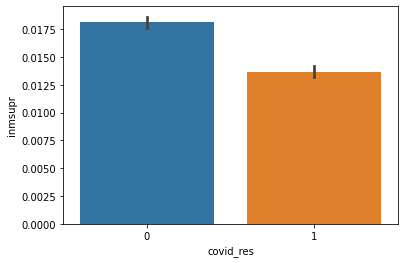

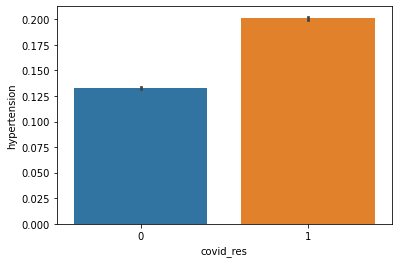

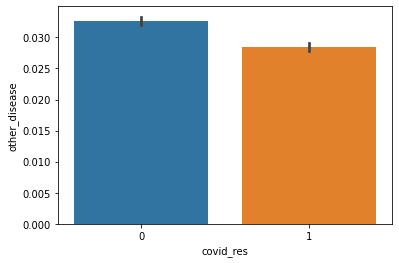

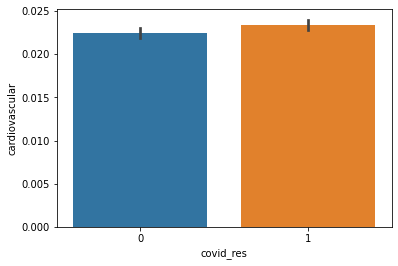

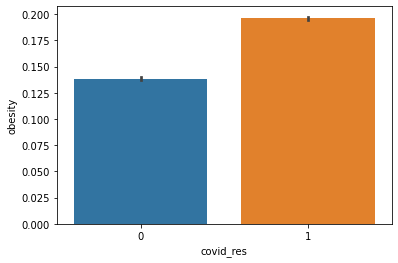

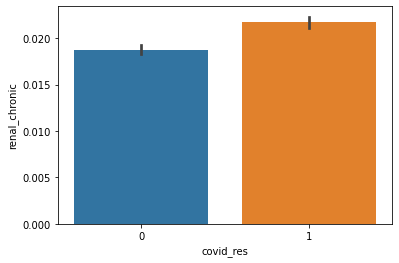

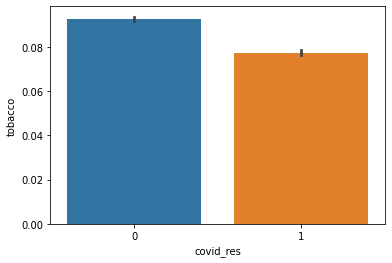

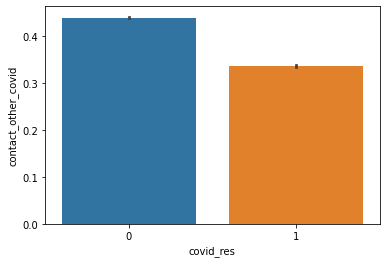

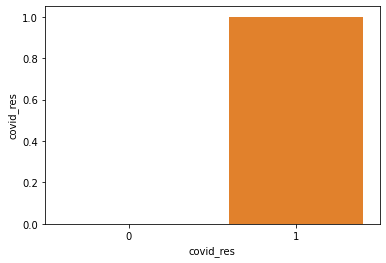

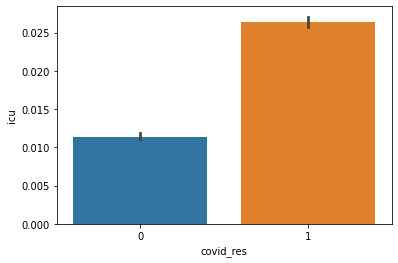

In [ ]:
for i, col in enumerate(covid.columns):
  plt.figure(i)
  sns.barplot(x='covid_res', y=col, data=covid)
covid

'''De modo geral, o barplot nos mostra uma relevancia grande de algumas comorbidades para resultados positivos de Covid'''

#5.0 **Modelagem dos Dados**

'''Utilizaremos modelos supervisionados por conhecermos o valor que queremos predizer, que seria a confirmação de casos de Covid a partir dos diagnósticos e informações dos pacientes e por se tratar de um dataset que temos a variável 'target' e utilizaremos modelos e métricas de classificação para treino, teste e produção, assim como utilizaremos matriz de confusão nas métricas devido ao fato de serem variáveis discretas e de classificação.'''

##5.1 Separando as features e o target

In [ ]:
X = covid.drop(['covid_res'], axis = 1)
y = covid['covid_res']

##5.2 **Decision Tree Classification**

In [ ]:
X_train, X_test, y_train, y_test = (
    model_selection.train_test_split(
        X, 
        y,  
        test_size=0.3,  
        random_state=42, 
        stratify=y  
    )
)

###5.21 Instanciando o modelo e definindo hiperparâmetros

In [ ]:
model_dt = DecisionTreeClassifier(
    criterion='gini',
    splitter='best',
    max_depth=3,
    min_samples_split=2,
    min_samples_leaf=1,
    min_weight_fraction_leaf=0.0,
    max_features=None,
    random_state=None,
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,
    class_weight=None,
    ccp_alpha=0.0
)

###5.22 Fitting dos dados

In [ ]:
model_dt.fit(X_train, y_train) # hora do modelo 'aprender com os dados'

DecisionTreeClassifier(max_depth=3)

###5.23 Avaliação e Métricas

In [ ]:
y_pred = model_dt.predict(X_test)

In [ ]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.62      0.87      0.72     83711
           1       0.66      0.33      0.44     66197

    accuracy                           0.63    149908
   macro avg       0.64      0.60      0.58    149908
weighted avg       0.64      0.63      0.60    149908



###5.24 Matriz de Confusão

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f54eb894b10>)

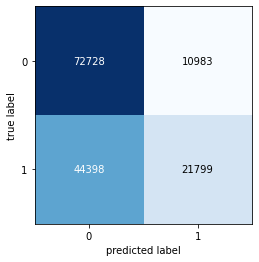

In [ ]:
cm = confusion_matrix(y_test, y_pred)

plot_confusion_matrix(conf_mat=cm)

''' No geral a diagonal TP/TN apresenta bons numeros juntamente com a de FP, porém o valor alto do FP demanda atenção.'''

In [ ]:
from dtreeviz.trees import dtreeviz

def plot_dtree(model, X_train, y_train, target_name):
    viz = dtreeviz(model, X_train, y_train,
                    target_name=target_name ,
                    feature_names=X_train.columns,
                    class_names=list(y_train))
    return viz

findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3208: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asarray(a).size
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atlea

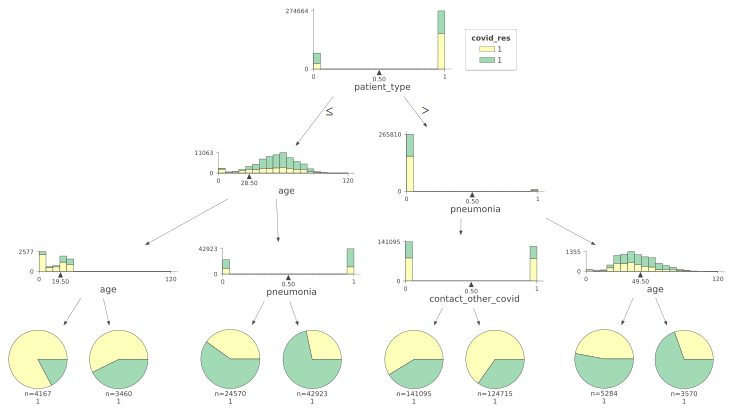

In [ ]:
viz = plot_dtree(model_dt, X_train, y_train, 'covid_res')
viz

##6.0 **AdaBoost Classification**

###6.1 Separando as features e o target

In [ ]:
X = covid.drop(['covid_res'], axis = 1)
y = covid['covid_res']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

###6.2 Instanciando o modelo

In [ ]:
modelo = AdaBoostClassifier(random_state = 42)

###6.21 Fitting dos dados

In [ ]:
modelo.fit(X_train, y_train) # hora do modelo 'aprender com os dados'

AdaBoostClassifier(random_state=42)

###6.22 Rodando o teste

In [ ]:
y_pred = modelo.predict(X_test)

###6.2 Avaliação e Métricas

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.63      0.84      0.72     83711
           1       0.65      0.37      0.48     66197

    accuracy                           0.64    149908
   macro avg       0.64      0.61      0.60    149908
weighted avg       0.64      0.64      0.61    149908



###6.23 Matriz de Confusão

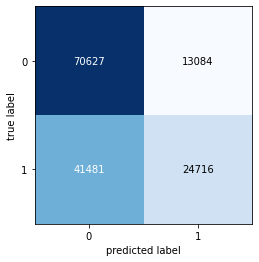

In [ ]:
cm = confusion_matrix(y_test, y_pred)

plot_confusion_matrix(conf_mat=cm)
plt.show()

''' Resultados parecidos percentualmente a CM de Árvore de Decisão. No geral a diagonal TP/TN apresenta bons numeros juntamente com a de FP, porém o valor alto do FP demanda atenção.'''

##7.0 **XGBoost**

###7.1 Instanciando o modelo

In [ ]:
clf = XGBClassifier(random_state = 42)


###7.12 Fitting dos dados

In [ ]:
clf.fit(X_train, y_train) # hora do modelo 'aprender com os dados'
y_pred = clf.predict(X_test)

###7.13 Avaliação e Métricas

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.63      0.86      0.73     83711
           1       0.67      0.36      0.47     66197

    accuracy                           0.64    149908
   macro avg       0.65      0.61      0.60    149908
weighted avg       0.65      0.64      0.61    149908



###7.14 Matriz de Confusão

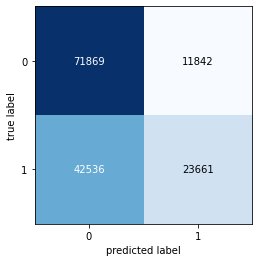

In [ ]:
cm = confusion_matrix(y_test, y_pred)

plot_confusion_matrix(conf_mat=cm)
plt.show()

''' Resultados parecidos percentualmente a CM de AdaBoost. No geral a diagonal TP/TN apresenta bons numeros juntamente com a de FP, porém o valor alto do FN demanda atenção.'''

##8.0 **LightGBM**

###8.1 Instanciando o modelo

In [ ]:
clf2 = lgb.LGBMClassifier(random_state = 42)


###8.12 Fitting dos dados

In [ ]:
clf2.fit(X_train, y_train)  # hora do modelo 'aprender com os dados'

y_pred = clf2.predict(X_test)                           

###8.12 Avaliação e Métricas

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.63      0.86      0.73     83711
           1       0.67      0.36      0.47     66197

    accuracy                           0.64    149908
   macro avg       0.65      0.61      0.60    149908
weighted avg       0.65      0.64      0.61    149908



###8.13 Matriz de confusão

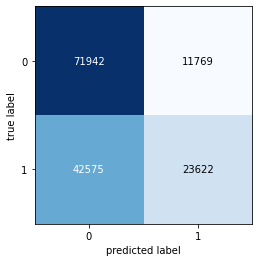

In [ ]:
cm = confusion_matrix(y_test, y_pred)

plot_confusion_matrix(conf_mat=cm)
plt.show()

''' Resultados parecidos percentualmente a CM dos modelos previamente testados. No geral a diagonal TP/TN apresenta bons numeros juntamente com a de FP, porém o valor alto do FP demanda atenção.'''

##9.0 **Random Forest Classification**

###9.1 Separando as features e o target





In [ ]:
X = covid.drop(['covid_res'], axis = 1)
y = covid['covid_res']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

###9.12 Instanciando o modelo e definindo hiperparâmetros

In [ ]:
model = RandomForestClassifier(
    n_estimators=100, 
    criterion='gini',
    max_depth=None,  
    min_samples_split=2,
    min_samples_leaf=1,
    min_weight_fraction_leaf=0.0,
    max_features='auto',
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,
    bootstrap=True,
    oob_score=False,  # OOB
    n_jobs=None,
    random_state=None,
    verbose=0,
    warm_start=False,
    class_weight=None,
    ccp_alpha=0.0,
    max_samples=None,  
)

###9.13 Fitting dos dados

In [ ]:
model.fit(X_train, y_train)  # hora do modelo 'aprender com os dados'

RandomForestClassifier()

###9.14 Predição

In [ ]:
y_pred = model.predict(X_test)

###9.15 Avaliação e Métricas

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.62      0.82      0.71     83711
           1       0.63      0.37      0.46     66197

    accuracy                           0.62    149908
   macro avg       0.62      0.60      0.59    149908
weighted avg       0.62      0.62      0.60    149908



###9.16 Matriz de confusão

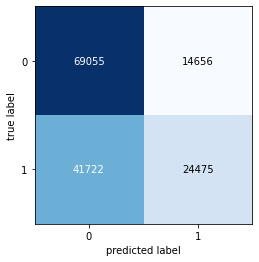

In [ ]:
cm = confusion_matrix(y_test, y_pred)

plot_confusion_matrix(conf_mat=cm)
plt.show()

''' Resultado parecidos percentualmente a CM dos modelos anteriores. No geral a diagonal TP/TN apresenta bons numeros juntamente com a de FP, porém o valor alto do FP demanda atenção.'''

#10.0 **ROC-AUC**






'''Aqui vamos finalmente avaliar e comparar os modelos de classificação utilizados.'''

In [ ]:
def test_models_plot_roc_auc_curve(
        model_list,
        X_train,
        X_test,
        y_train,
        y_test):
    response = {}
    for mdl in model_list:
        model = mdl.get('estimator')
        model.fit(X_train, y_train)
        y_predict = model.predict(X_test)

        
        fpr, tpr, thresholds = metrics.roc_curve(y_test, model.predict_proba(X_test)[:,1])

        model_name = mdl.get('model_name')
        accuracy = metrics.accuracy_score(y_test, y_predict)
        auc = metrics.roc_auc_score(y_test, model.predict(X_test))
        precision = metrics.precision_score(y_test, y_predict, average='weighted')
        recall = metrics.recall_score(y_test, y_predict, average='weighted')
        f1_score = metrics.f1_score(y_test, y_predict, average='weighted')
        plt.plot(fpr, tpr, label='%s ROC (AUC = %0.2f)' % (mdl.get('model_name'), auc))

        print(f"Model      : {model_name}")
        print(f"Accuracy   : {accuracy:.4f} ")
        print(f"Precision  : {precision:.4f}")
        print(f"Recall     : {recall:.4f}")
        print(f"F1 - Score : {f1_score:.4f} ")
        print(f"ROC - AUC  : {auc:.4f} ")
        print("======================")

        response[mdl.get('model_name')]  = {
            "accuracy": accuracy,
            "precision": precision,
            "recall": recall,
            "f1_score": f1_score,
            "auc": auc,
        }
        

    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC-AUC curve')
    plt.legend(loc="lower right")
    plt.show()
    return response

In [ ]:
random_seed = 42

list_models = [
  {
      "model_name": "Decision Tree",
      "estimator": DecisionTreeClassifier(random_state=random_seed)
  },
  {
      "model_name": "AdaBoost",
      "estimator": AdaBoostClassifier(random_state=random_seed)
  },
  {
      "model_name": "XGBoost",
      "estimator": XGBClassifier(random_state=random_seed)
  },
  {
      "model_name": "LightGBM",
      "estimator": lgb.LGBMClassifier(random_state=random_seed)
  },
  {
      "model_name": "Random Forest",
      "estimator": RandomForestClassifier(random_state=random_seed)
  },
]

Model      : Decision Tree
Accuracy   : 0.6214 
Precision  : 0.6228
Recall     : 0.6214
F1 - Score : 0.5963 
ROC - AUC  : 0.5933 
Model      : AdaBoost
Accuracy   : 0.6360 
Precision  : 0.6405
Recall     : 0.6360
F1 - Score : 0.6127 
ROC - AUC  : 0.6085 
Model      : XGBoost
Accuracy   : 0.6373 
Precision  : 0.6451
Recall     : 0.6373
F1 - Score : 0.6106 
ROC - AUC  : 0.6080 
Model      : LightGBM
Accuracy   : 0.6375 
Precision  : 0.6455
Recall     : 0.6375
F1 - Score : 0.6107 
ROC - AUC  : 0.6081 
Model      : Random Forest
Accuracy   : 0.6236 
Precision  : 0.6237
Recall     : 0.6236
F1 - Score : 0.6018 
ROC - AUC  : 0.5972 


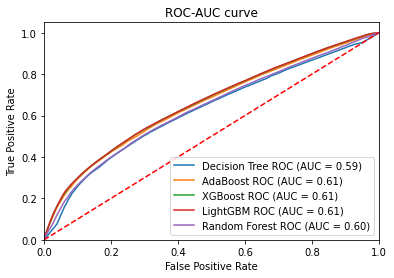

In [ ]:
pipeline_response = test_models_plot_roc_auc_curve(
    list_models,
    X_train,
    X_test,
    y_train,
    y_test
)

'''O modelo LIghGBM apresenta o melhor AUC (maior área sob a curva) e uma melhor relação recall e especificity'''

In [ ]:
pipeline_response

{'AdaBoost': {'accuracy': 0.6360100861861941,
  'auc': 0.6085353722212441,
  'f1_score': 0.612707564356431,
  'precision': 0.6405320927955547,
  'recall': 0.6360100861861941},
 'Decision Tree': {'accuracy': 0.6214077967820263,
  'auc': 0.5932624551177822,
  'f1_score': 0.5962770824082625,
  'precision': 0.6228200802137566,
  'recall': 0.6214077967820263},
 'LightGBM': {'accuracy': 0.6374843237185474,
  'auc': 0.6081265617179721,
  'f1_score': 0.6106876049286286,
  'precision': 0.645547439072144,
  'recall': 0.6374843237185474},
 'Random Forest': {'accuracy': 0.6235891346692638,
  'auc': 0.5972099189588034,
  'f1_score': 0.6018017530487013,
  'precision': 0.6236820098832583,
  'recall': 0.6235891346692638},
 'XGBoost': {'accuracy': 0.6372575179443392,
  'auc': 0.6079851130613338,
  'f1_score': 0.6106177449596579,
  'precision': 0.6450898348871147,
  'recall': 0.6372575179443392}}

In [ ]:
lista_metricas = list(pipeline_response[list(pipeline_response.keys())[0]].keys())
t = PrettyTable()
t.field_names = ['modelo'] + lista_metricas

for modelo in pipeline_response.keys():
    metricas = list(pipeline_response[modelo].values())
    metricas_fmt = [f"{metrica*100:.2f}" for metrica in metricas]

    t.add_row(
        [modelo] + metricas_fmt
    )
t

modelo,accuracy,precision,recall,f1_score,auc
Decision Tree,62.14,62.28,62.14,59.63,59.33
AdaBoost,63.60,64.05,63.60,61.27,60.85
XGBoost,63.73,64.51,63.73,61.06,60.80
LightGBM,63.75,64.55,63.75,61.07,60.81
Random Forest,62.36,62.37,62.36,60.18,59.72


'''Os resultados foram muito parecidos, mas dos modelos testados o LightGBM foi o que apresentou melhores métricas de precisão e de recall e portanto será o modelo que iremos rodar a validação cruzada e a base de dados de produção. Optei pro priorizar o maior recall, pois entendo que erro tipo II será melhor, pois o mais importante será acertar a maior percentual possível de casos positivos e negativos e os falsos positivos não terão impacto, já que não comprometerão a saúde do paciente.'''

#11.0 **Otimização do Modelo** (LightGBM)

##11.1 Validação Cruzada com RandomizedSearchCV

In [ ]:
 # agora vamos testar a robustez do modelo para identificar e tratar posssíveis 'drifts'.

model = lgb.LGBMClassifier(random_state = 42)

In [ ]:
n_estimators = [int(x) for x in np.linspace(start=200, stop=500, num=3)]
max_depth = [int(x) for x in np.linspace(10, 30, num=3)]
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]

params_grid = {
    'n_estimators': n_estimators,
    'max_depth': max_depth,
    'min_samples_split': min_samples_split,
    'min_samples_leaf': min_samples_leaf
}
print(params_grid)

{'n_estimators': [200, 350, 500], 'max_depth': [10, 20, 30], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4]}


In [ ]:
random_search = RandomizedSearchCV(
    estimator=model,
    param_distributions=params_grid,
    n_iter=80,
    cv=3,
    verbose=2,
    n_jobs=-1
)

In [ ]:
random_search.fit(X_train, y_train)

Fitting 3 folds for each of 80 candidates, totalling 240 fits


RandomizedSearchCV(cv=3, estimator=LGBMClassifier(random_state=42), n_iter=80,
                   n_jobs=-1,
                   param_distributions={'max_depth': [10, 20, 30],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 350, 500]},
                   verbose=2)

In [ ]:
print(random_search.cv_results_['mean_test_score'].mean())

0.6369625287867666


In [ ]:
random_search.best_params_

{'max_depth': 30,
 'min_samples_leaf': 1,
 'min_samples_split': 10,
 'n_estimators': 200}

In [ ]:
model_rs = lgb.LGBMClassifier(**random_search.best_params_)

In [ ]:
model_rs

LGBMClassifier(max_depth=30, min_samples_leaf=1, min_samples_split=10,
               n_estimators=200)

In [ ]:
model_rs.fit(X_train, y_train)

LGBMClassifier(max_depth=30, min_samples_leaf=1, min_samples_split=10,
               n_estimators=200)

In [ ]:
y_pred_rs = model_rs.predict(X_test)

In [ ]:
print(accuracy_score(y_test, y_pred_rs))

0.6372575179443392


In [ ]:
acc_random = accuracy_score(y_test, y_pred_rs)
acc = accuracy_score(y_test, y_pred)




In [ ]:
print("Comparação das Acurácias: ")
print('Acurácia sem Otimização:         ', np.round(acc, 3))
print('Acurácia com RandomizedSearchCV: ', np.round(acc_random, 3))

Comparação das Acurácias: 
Acurácia sem Otimização:          0.624
Acurácia com RandomizedSearchCV:  0.637


'''Houve uma pequena melhora e o modelo se mostra robusto, confirmado pelo resultado da validação cruzada, com uma taxa de acerto de 63.7%'''

#12.0 **Teste do modelo com dataset de produção**

##12.1 Extração dos dados, EDA e Tratamento

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving COVID_subm.csv to COVID_subm.csv


In [ ]:
covid_subm = pd.read_csv('COVID_subm.csv')

In [ ]:
covid_subm.head()

,Unnamed: 0,sex,patient_type,intubed,pneumonia,age,pregnancy,diabetes,copd,asthma,inmsupr,hypertension,other_disease,cardiovascular,obesity,renal_chronic,tobacco,contact_other_covid,icu
0,373402,1,1,NaN,0.0,35,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,NaN
1,181022,0,1,NaN,0.0,26,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN
2,317841,0,1,NaN,0.0,57,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
3,272745,1,1,NaN,0.0,40,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN
4,153280,0,0,0.0,0.0,55,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0


In [ ]:
covid_subm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           1000 non-null   int64  
 1   sex                  1000 non-null   int64  
 2   patient_type         1000 non-null   int64  
 3   intubed              229 non-null    float64
 4   pneumonia            1000 non-null   float64
 5   age                  1000 non-null   int64  
 6   pregnancy            482 non-null    float64
 7   diabetes             996 non-null    float64
 8   copd                 997 non-null    float64
 9   asthma               996 non-null    float64
 10  inmsupr              997 non-null    float64
 11  hypertension         997 non-null    float64
 12  other_disease        997 non-null    float64
 13  cardiovascular       997 non-null    float64
 14  obesity              996 non-null    float64
 15  renal_chronic        997 non-null    fl

In [ ]:
covid_subm.isna().sum()

Unnamed: 0               0
sex                      0
patient_type             0
intubed                771
pneumonia                0
age                      0
pregnancy              518
diabetes                 4
copd                     3
asthma                   4
inmsupr                  3
hypertension             3
other_disease            3
cardiovascular           3
obesity                  4
renal_chronic            3
tobacco                  4
contact_other_covid    330
icu                    771
dtype: int64

In [ ]:
covid_subm.fillna(0, inplace=True)

In [ ]:
covid_subm.drop_duplicates(inplace=True)

In [ ]:
covid_subm = covid_subm.drop(columns=['Unnamed: 0'])

In [ ]:
covid_subm.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   sex                  1000 non-null   int64  
 1   patient_type         1000 non-null   int64  
 2   intubed              1000 non-null   float64
 3   pneumonia            1000 non-null   float64
 4   age                  1000 non-null   int64  
 5   pregnancy            1000 non-null   float64
 6   diabetes             1000 non-null   float64
 7   copd                 1000 non-null   float64
 8   asthma               1000 non-null   float64
 9   inmsupr              1000 non-null   float64
 10  hypertension         1000 non-null   float64
 11  other_disease        1000 non-null   float64
 12  cardiovascular       1000 non-null   float64
 13  obesity              1000 non-null   float64
 14  renal_chronic        1000 non-null   float64
 15  tobacco              1000 non-null   fl

##12.2 Predição com o modelo otimizado e resultado

In [ ]:
y_pred_rs = model_rs.predict(covid_subm)

In [ ]:
print(y_pred_rs)

[0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0 1 0 1 0 0 0 0
 1 1 1 0 0 1 1 0 0 0 0 1 0 0 1 1 0 0 0 0 1 0 0 1 1 1 0 1 0 0 0 1 0 1 0 1 0
 1 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0
 0 1 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 1 0 0 0 1 0 1 1 0 0 0 0 1 0 0 0 0 0 0
 0 1 1 1 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 1 1 1 1 0 0 0 0
 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 1 0 1 1 1 0 1 0
 0 0 1 1 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1 0 1 0 0 0 0 1 0 0 0 1 0
 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 1 1 0 0 0 0 0 1 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 1
 0 0 0 0 1 0 0 1 0 0 1 0 1 0 0 0 0 0 1 1 0 0 0 1 0 1 0 1 1 0 0 0 0 0 0 1 0
 1 1 0 0 1 0 0 1 1 0 0 0 

#13.0 **Conclusões**

'''Decidi simplificar por diversas vezes as ações a serem tomadas no projeto, priorizando sempre a simplificação de todos os tratamentos realizados no modelo justamente para evitar a criação de incertezas e de viéses. Me ví por diversas vezes no trade-off 'mostrar tudo o que sei' vs 'o que realmente precisa ser feito' e optei pela simplificação, acatando as limitações(minhas também) e simplificações que o modelo faz da realidade e de seu aprendizado. Também entendo que simplificar demais poder resultar em não fazer o que deveria ser feito e este balanço entendo que virá com o tempo e experiência.

Optei por definir e utilizar métodos de Ensemble e Boosting justamente por serem melhores para classificação de novas amostras, que será o caso da utilização do modelo em base de produção diferente da que treinamos e testamos e também pelo peso maior dado a features mais significativas para o dataset, porém também utilizei na base de treino/teste modelo de RF para fins de aprendizado e comparação de resultados.

Todos os modelos trazem valores parecidos e equilibrados entre Precision e Recall. Selecionamos o modelo LighhGBM priorizando o maior Recall, pois entendemos que o mais importante seria acertar o máximo de resultados positivos e negativos sendo toleráveis os casos de falso positivos. Um ponto sensível para melhoria seria o alto valor de falsos positivos, que em uma aplicação real poderia causar desconforto ou sofrimento emocional para as pessoas nesta classificação, além de recursos humanos e financeiros alocados para estes atendimentos.'''